# 爬虫基础

## 写代码注意

1/ 基础操作封装成api

2/ 复杂操作利用基础操作封装成api----这样做让代码更加一目了然. 不然在后期改动时就会被搞混.

3/ 对所有变量和api做好注释

## CPU密集型和IO密集型

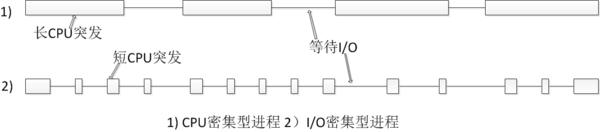

CPU密集型 用多进程

IO密集型  用多线程

## 计算程序运行时间

### time 模块

In [ ]:
import time
starttime = time.time() 

run = 0 
for i in range(1, 5000):
    for j in range(1, 5000):
        run += i + j

print(f"The result is {run}")

endtime = time.time() 
#跑完程序后的时间-跑程序前的时间，结果保留两位浮数点
print(f"It took {endtime-starttime:.2f} seconds to compute") 



### timeit模块

In [ ]:
from timeit import timeit #
'''只import timeit会报错
返回 *TypeError: 'module' object is not callable*
原因 *混淆了类名(class)和模块名(module)。
问题出在导入行，你正在导入一个module，而不是一个class；但是module和class有相同的名字。*
'''

def run():
    run = 0
    for i in range(1, 5000):
        for j in range(1, 5000):
            run += i + j
    return run

# timeit(调用函数run()，运行环境，number=运行次数)
# result = timeit('run()', setup='from __main__ import run', number=1)
result = timeit(run, number=1)
print(f"It took {result:.2f} seconds to compute")

## 迭代生成器

代码执行到yield会暂停，然后把结果返回出去，下次启动生成器会在暂停的位置继续往下执行

In [ ]:
my_generator = (i for i in ['我','爱','你','小','茜'])
print(next(my_generator))
print(next(my_generator))
print(next(my_generator))
print(next(my_generator))
print(next(my_generator))

In [ ]:
def func():
    for i in ('我','爱','你','小','茜'):
        yield i


t = func()
print(next(t))
print(next(t))
print(next(t))
print(next(t))
print(next(t))

# 基本库的使用

## urllib的使用

略

(用requests可基本实现urllib的内容,但requests是基于urllib实现的)

## requests的使用

### GET请求

#### 传递信息----params参数

In [ ]:
import requests

data = {
    'name':'germey',
    'age':25
}

test_url = 'https://www.httpbin.org/get'
r = requests.get(test_url, params=data)


print(r.text)

#### 得到JSON格式的数据----json()方法

(如果返回结果不是JSON格式, 就会出现解析错误,抛出json.decoder.JSONDecodeError异常)

In [ ]:
r.json()

#### 获取网页图标----'/favicon.ico'

In [ ]:
url =  'https://www.baidu.com/favicon.ico'
r = requests.get(url)
r.content

#### 保存二进制内容(图片、视频、音频)----open()方法

(第一个参数是文件路径&文件名, 第二个参数代表以二进制写的形式打开文件)

In [ ]:
with open(r'C:\Users\温柔的小茶花\Desktop\favicon.ico','wb') as f:       
    f.write(r.content)

#### 添加请求头----headers参数

In [ ]:
headers = {
    'User-Agent':'Mozilla/5.0'
}

r = requests.get(test_url, headers=headers)
print(r.text)

### 响应

#### 可响应内容

In [ ]:
print('status_code', r.status_code)
print('headers', r.headers)
print('cookies', r.cookies)
print('url', r.url)
print('history', r.history)

#### 获取状态码----status_code属性

https://blog.csdn.net/dgxin_605/article/details/109896967

In [ ]:
test_url = 'https://www.httpbin.org/post'

r = requests.post(test_url)

print(r.status_code)

### 高级用法

#### 文件上传----files参数

In [ ]:
files = {'file':open(r'C:\Users\温柔的小茶花\Desktop\favicon.ico', 'rb')}

r = requests.post(test_url, files=files)

print(r.text)

#### cookies设置---headers参数/cookies参数

首先登录网站, 然后将请求头中的Cookie内容复制下来,添加到headers参数里

In [ ]:
headers['Cookie'] = '_octo=GH1.1.1418806971.1660022676; _device_id=16959ce3f5e59cf1e7c1ff3a9a7a1799; preferred_color_mode=dark; tz=Asia/Shanghai; has_recent_activity=1; user_session=68zoEDuGcMub59kebD81REcMsRTGGCNKzHjhDQBu_9IE4E4k; __Host-user_session_same_site=68zoEDuGcMub59kebD81REcMsRTGGCNKzHjhDQBu_9IE4E4k; tz=Asia/Shanghai; color_mode={"color_mode":"auto","light_theme":{"name":"light","color_mode":"light"},"dark_theme":{"name":"dark","color_mode":"dark"}}; logged_in=yes; dotcom_user=SwankyTigerHaru; _gh_sess=hHWvwjQ5PXJkCCTg+mpGBtFBAaYmNnb8lrg2jw+dLcI07ljC99L6xe9kqiqEWQcrVNuaXmt1DTTn3NsoUOoMkKUGR1PkM1J4hZNUoZ2MZ6low6mublkblSSttdgFj7OteI+2TdH+/SwkqHQxZuZi/53yXXdDvxeEXTCGSRDDe29D8OGk3jP+I+2RXJeulNOFQNi8E64CF+cWCdLPu1Ng1YlRosiD6RbvplxJSNsaBMlCBGA1FTpSPfYarlcsnSM92LVHOi6Cr6no6TpLIVRio/TEddmPLXmLX2MeAckgWxnlI96ObcoCdVii/TCCt9yT2HBOq059yhiAVddqI8UahhVegBBE0gkCJFnOaz5AofbmvdkUXQVVFS/GLTVS1EzWnHS1iZKerg61DysMWy1yn0rdwaSq1tQzSNkfTQlrdKNpSieLKlMV1leix4CetzXnf73CBrR7Pwrgb52GDjwIC3VvogpVJFOC10Q7Kdf2EiWEijot2nPhgQU4f0cfVeqJiEGifV/bMEtJoABX3G5ysBeL1RNKJ9EMsOcw5SC2dcSQqFLEnZOBwlgqGJ2LEi7u+iOG2azs0WSbcpSVVUDtkXbM3+atZ/NOE33I3dN6gl0KSyel+wEsRtgq7ZSrruAYNSPcVkYOeuCaC+Ea0pWz7a9VxMz+DS+Y5l6IJlbA+uEuGHYh/Sb6NCiIuYsUrDnh3JV/U5+APLBhcEB1XlHb1utWgdYzokFDM4bsK+u6AFvZjKklc0uPT2bI3MJxp97YNkdYeZcMIhJndG6WjCnvd9I3cNYZQ+n0zsyu6y5+yXJ9h46emxVSVB3QSenRpQ1lWMURguDTMHqFB/tthSiJBOCYn242jvmSjdjE2HhG4WhD+2MypneLaUar6B9NJruWHNH6OSYyFPyHugd/kDBzl6IcbcpEGGPhmHlqgCwRGBpB1W7jVKADOOUGO08Qy0DK1pu4LRHvDhxf6qgYFvM4kohUilXIwNgwTVWjcQ==--XkQefwO4nzJNUekF--0m5WNvKTexIgIkt7OGqLrQ=='
r = requests.get('https://github.com/', headers=headers)

print(r.text)

也可以通过cookies参数来设置Cookie的信息

In [ ]:
jar = requests.cookies.RequestsCookieJar()    # 新建一个RequestsCookieJar对象

cookies = '_octo=GH1.1.1418806971.1660022676; _device_id=16959ce3f5e59cf1e7c1ff3a9a7a1799; preferred_color_mode=dark; tz=Asia/Shanghai; has_recent_activity=1; user_session=68zoEDuGcMub59kebD81REcMsRTGGCNKzHjhDQBu_9IE4E4k; __Host-user_session_same_site=68zoEDuGcMub59kebD81REcMsRTGGCNKzHjhDQBu_9IE4E4k; tz=Asia/Shanghai; color_mode={"color_mode":"auto","light_theme":{"name":"light","color_mode":"light"},"dark_theme":{"name":"dark","color_mode":"dark"}}; logged_in=yes; dotcom_user=SwankyTigerHaru; _gh_sess=hHWvwjQ5PXJkCCTg+mpGBtFBAaYmNnb8lrg2jw+dLcI07ljC99L6xe9kqiqEWQcrVNuaXmt1DTTn3NsoUOoMkKUGR1PkM1J4hZNUoZ2MZ6low6mublkblSSttdgFj7OteI+2TdH+/SwkqHQxZuZi/53yXXdDvxeEXTCGSRDDe29D8OGk3jP+I+2RXJeulNOFQNi8E64CF+cWCdLPu1Ng1YlRosiD6RbvplxJSNsaBMlCBGA1FTpSPfYarlcsnSM92LVHOi6Cr6no6TpLIVRio/TEddmPLXmLX2MeAckgWxnlI96ObcoCdVii/TCCt9yT2HBOq059yhiAVddqI8UahhVegBBE0gkCJFnOaz5AofbmvdkUXQVVFS/GLTVS1EzWnHS1iZKerg61DysMWy1yn0rdwaSq1tQzSNkfTQlrdKNpSieLKlMV1leix4CetzXnf73CBrR7Pwrgb52GDjwIC3VvogpVJFOC10Q7Kdf2EiWEijot2nPhgQU4f0cfVeqJiEGifV/bMEtJoABX3G5ysBeL1RNKJ9EMsOcw5SC2dcSQqFLEnZOBwlgqGJ2LEi7u+iOG2azs0WSbcpSVVUDtkXbM3+atZ/NOE33I3dN6gl0KSyel+wEsRtgq7ZSrruAYNSPcVkYOeuCaC+Ea0pWz7a9VxMz+DS+Y5l6IJlbA+uEuGHYh/Sb6NCiIuYsUrDnh3JV/U5+APLBhcEB1XlHb1utWgdYzokFDM4bsK+u6AFvZjKklc0uPT2bI3MJxp97YNkdYeZcMIhJndG6WjCnvd9I3cNYZQ+n0zsyu6y5+yXJ9h46emxVSVB3QSenRpQ1lWMURguDTMHqFB/tthSiJBOCYn242jvmSjdjE2HhG4WhD+2MypneLaUar6B9NJruWHNH6OSYyFPyHugd/kDBzl6IcbcpEGGPhmHlqgCwRGBpB1W7jVKADOOUGO08Qy0DK1pu4LRHvDhxf6qgYFvM4kohUilXIwNgwTVWjcQ==--XkQefwO4nzJNUekF--0m5WNvKTexIgIkt7OGqLrQ=='

for cookie in cookies.split(';'):
    key, value = cookie.split('=',1)          # 用split()方法对复制下来的Cookie内容作分割
    jar.set(key,value)                        # 用set()方法设置每个cookie条目的键名和键值
    
r = requests.get('https://github.com/', headers=headers, cookies=jar)  #用cookies参数传递对象

print(r.text)

#### session维持----Session()方法

可用于模拟在一个浏览器中打开同一站点的不同页面        (后面章节会有详细内容)

In [ ]:
import requests


s = requests.Session()
s.get('https://www.httpbin.org/cookies/set/number/123456789')

r = s.get('https://www.httpbin.org/cookies')
print(r.text)

#### SSL证书验证----verify参数设置为False

如果网站没有设置好HTTPS证书，或者其证书不被CA机构认可，则访问该网站可能出现SSL证书错误的提示。

In [ ]:
try:
    r = requests.get('https://ssr2.scrape.center/')
    print('不设置verify' + response.status_code)
except Exception as r:
    print(f'发生错误: {r}')

In [ ]:
r = requests.get('https://ssr2.scrape.center/',verify=False)
print('设置verify' + response.status_code)

#### 超时设置----timeout参数

In [ ]:
import requests
r = requests.get('https://www.httpbin.org',timeout=2)   # 这里timeout参数的值是'请求'&'读取'时间的和
print(r.status_code)

In [ ]:
r = requests.get('https://www.httpbin.org',timeout=(1,1))   # 这里timeout参数为元组,前一个为'请求时间',后一个为'读取时间'
print(r.status_code)

#### 身份认证----auth参数

In [ ]:
import requests


r = requests.get('https://ssr3.scrape.center/',auth=('admin','admin'))  
print(r.status_code)

#### 代理设置----proxies参数

暂略.   教材P61

## 正则表达式

### 常用的匹配规则

\w          字母,数字,下划线

\W          不是(字母,数字,下划线)的字符

\s          任意空白字符

\S          任意非空字符

\d          任意数字

\D          任意非数字的字符

\A          字符串开头

\Z          字符串结尾

\G          最后匹配完成的位置

\n          一个换行符

\t          一个制表符

^           一行字符串的开头

$           一行字符串的结尾

.           除了换行符的任意字符  (当re.DOTALL标记被指定时,可以匹配到换行符)

[ abc]        匹配 a 或 b 或 c

[^abc]        匹配 a b c 之外的字符

*           匹配0个或多个表达式

+           匹配1个或多个表达式

?           匹配0个或1个 前面的正则表达式定义的片段,非贪婪方式

{n}          精确匹配n个前面的表达式

{n|m}         匹配n到m次由前面正则表达式定义的片段,贪婪方式

a|b          匹配a或b

( )          匹配括号内的表达式,也表示一个组

### match()方法

从字符串的起始位置开始匹配

In [ ]:
import re


content = 'Hello 123 4567 World_This is a Regex Demo'
print(len(content))
result = re.match('^Hello\s\d\d\d\s\d{4}\s\w{10}',content)
print(result)
print(result.group())     # group()方法----输出匹配到的内容
print(result.span())      # span()方法----匹配到的字符串在原字符串中的位置范围

#### 匹配目标

In [ ]:
import re


content = 'Hello 1234567 World_This is a Regex Demo'


result = re.match('^Hello\s(\d+)\sWorld',content)
print(result)
print(result.group())           # group()方法----输出完整的匹配方法
print(result.group(1))           # group(1)方法----输出第一个被( )包围的匹配结果

#### 通用匹配

In [ ]:
import re


content = 'Hello 1234567 World_This\n is a Regex Demo'


result = re.match('^Hello.*',content)         # .* 匹配(不包含换行符的)任意数量的任意字符
print(result)
print(result.group()) 

#### 贪婪与非贪婪

In [ ]:
import re


content = 'Hello 1234567 World_This\n is a Regex Demo'

result1 = re.match('^Hello.*(\d+)',content)    
print('result1:\t' + result1.group(1))               # .*  贪婪模式把123456全吃了,只留了一个7给 (\d+)


result2 = re.match('^Hello.*?(\d+)',content)    
print('result2:\t' + result2.group(1))               # .*? 非贪婪模式把1234567全给 (\d+)

#### 修饰符

re.I ----                         # 使匹配对大小写不敏感

re.L ----                         # 实现本地化识别匹配

re.M  ----                        # 多行匹配, 影响^和$

re.S    ----                      # 使匹配内容包括换行符在内的所有字符

re.U    ----                      # 根据Unicode字符集解析字符, 影响\w, \W, \b, \B

re.X      ----                    # 该标志能够给予你更灵活的格式, 使正则表达式书更易于理解

#### 转义匹配

当在目标字符串中遇到用作正则匹配模式的特殊字符时,在次字符前面加反斜线 \ 转义一下。

### search()方法

### findall()方法

### sub()方法

### compile()方法

## httpx的使用

# 网页数据的解析提取

# 数据的存储

# Ajax数据爬取




Ajax的定义: 利用JavaScript在保证页面不被刷新、页面链接不改变的情况下，与服务器交换数据并更新部分网页内容的技术。

Ajax的标记: XHR ---- Requests Headers(请求头) ---- X-Requests-With:XMLHttpRequest

Ajax的数据: Preview(预览)选项卡 & Response(响应)选项卡

In [ ]:
import requests
import logging


logging.basicConfig(level=logging.INFO,
                   format=f'%(asctime)s - %(levelname)s: %(message)s')

INDEX_URL = 'https://spa1.scrape.center/api/movie/?limit={limit}&offset={offset}'
LIMIT = 10
DETAIL_URL = 'https://spa1.scrape.center/api/movie/{id}'
TOTAL_PAGE = 10

def scrape_api(url):    # 注意: 这个抓取api返回的是json格式. 如果内容不是json格式则会报错
    logging.info(f'scraping {url}')
    try:
        response = requests.get(url)
        if response.status_code == 200:
            return response.json()
        logging.error(f'get invalid status code {response.status_code} while scraping {url}')
    except requests.RequestException:
        logging.error(f'error occurred while scraping {url}', exc_info=True)
    
def scrape_index(page):
    url = INDEX_URL.format(limit=LIMIT, offset=LIMIT*(page-1))
    return scrape_api(url)

def scrape_detail(id):
    url = DETAIL_URL.format(id=id)
    return scrape_api(url)

def main():
    for page in range(1,TOTAL_PAGE + 1):
        index_data = scrape_index(page)
        for item in index_data.get('results'):
            id = item.get('id')
            detail_data = scrape_detail(id)
            logging.info(f'detail data: {detail_data}')

if __name__ == '__main__':
    main()
    


# 异步爬虫

## 基础知识

IO密集型任务

# JavaScript动态渲染页面爬取

## Selenium的使用

### 基础综合

In [ ]:
from selenium import webdriver                                   # 导入模块
from selenium.webdriver.common.by import By                      # 导入by模块
from selenium import ActionChains                                # 导入动作链模块


browser = webdriver.Edge()                                       # 初始化浏览器对象
browser.get('https://www.taobao.com')                            # get()方法----访问页面
print(browser.page_source)                                       # page_source属性----页面源代码
button_1 = browser.find_element(By.XPATH, '//*[@id="J_TSearchForm"]/div[1]/button')
input_1 = browser.find_element(By.XPATH, '//*[@id="q"]')         # find_element()方法----查找单个节点(如有多个目标节点,则只能匹配到第一个)
list_1 = browser.find_elements(By.XPATH, '/html/body/div')       # find_elements()方法----查找多个节点(结果是一个包含多节点的列表)

input_1.send_keys('iPhone')                                      # send_keys()方法----输入文字
input_1.clear()                                                  # clear()方法----清空文字
button_1.click()                                                 # click()方法----点击按钮

In [ ]:
from selenium import webdriver                                   # 导入模块
from selenium.webdriver.common.by import By                      # 导入by模块
from selenium.webdriver import ActionChains                      # 导入动作链模块


browser = webdriver.Edge()
url = 'https://www.runoob.com/try/try.php?filename=jqueryui-apidroppable'
browser.get(url)
browser.switch_to.frame('iframeResult')                          # 转到对应frame
source = browser.find_element(By.CSS_SELECTOR, '#draggable')
target = browser.find_element(By.CSS_SELECTOR, '#droppable')
actions = ActionChains(browser)                                  # 初始化动作链对象
actions.drag_and_drop(source, target)                            # 设计动作
actions.perform()                                                # 执行动作

### 延时等待

(P221 有更多等待条件)

#### 隐式等待

如果Selenium没有在DOM中找到节点, 将继续等待, 在超出设定时间后, 抛出找不到节点的异常.

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By

browser = webdriver.Edge()
browser.implicitly_wait(10)          
browser.get('https://www.baidu.com')
input = browser.find_element(By.XPATH, '//*[@id="kw"]')
print(input)

#### 显式等待

指定要查找的节点和最长等待时间. 如果规定时间依然没有加载出点, 就抛出超时异常.

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


browser = webdriver.Edge()     
browser.get('https://www.taobao.com')
wait = WebDriverWait(browser, 10)                                  # 指定最长等待时间
input = wait.until(EC.presence_of_element_located((By.ID, 'q')))
button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, '.btn-search')))
print(input, button)

### 前进和后退----forward()方法 & back()方法

In [ ]:
import time 
from selenium import webdriver


browser = webdriver.Edge()
browser.get('https://www.baidu.com')
browser.get('https://www.taobao.com')
browser.get('https://www.jd.com')
browser.back()
time.sleep(1)
browser.forward()
browser.close()

### Cookie

In [ ]:
from selenium import webdriver


browser = webdriver.Edge()
browser.get('https://www.zhihu.com/explore')
print(browser.get_cookies())                        # get_cookies()方法----获取所有cookie
browser.add_cookie({'name':'name',                  # add_cookie( )方法----添加cookie
                    'domin':'www.zhihu.com',
                    'value':'germey'})
print(browser.get_cookies())
browser.delete_all_cookies()                        # delete_all_cookies()方法----删除所有cookie
print(browser.get_cookies())

In [ ]:
# cookies 登录

import json
from selenium.webdriver import ChromeOptions
from selenium import webdriver


option = ChromeOptions()
option.add_experimental_option('excludeSwitches', ['enable-automation'])
option.add_experimental_option('useAutomationExtension', False)
browser = webdriver.Chrome(options=option)
browser.execute_cdp_cmd('Page.addScriptToEvaluateOnNewDocument', {
    'source': 'Object.defineProperty(navigator, "webdriver", {get: () => undefined})'
})
url_1 = 'https://www.douyin.com'
login_cookies_1 = 'douyin_cookies.json'


# 手动登录获取并保存cookies
def login_for_cookies():
    browser.get(url_1)
    input("登陆成功后回车以继续")
    cookies = browser.get_cookies()  # 已经获取到了cookies
    with open(login_cookies_1, "w", encoding="utf-8") as cks:  # 把cookies使用json保存
        json.dump(cookies, cks)


# 读取cookies文件,加载cookies实现登录
def login_by_cookies():
    browser.get(url_1)
    # 从保存文件中提取cookies
    f1 = open(login_cookies_1)
    cookie = f1.read()
    cookie_list = json.loads(cookie)  # json读取cookies
    for c in cookie_list:
        browser.add_cookie(c)  # 取出的cookie循环加入driver
    browser.refresh()  # 刷新后页面显示已登录


login_for_cookies()
login_by_cookies()


### 选项卡管理

In [ ]:
import time
from selenium import webdriver


browser = webdriver.Edge()
browser.get('https://www.baidu.com')
browser.execute_script('window.open()')                 # execute_script('window.open()')----新开一个选项卡
print(browser.window_handles)
browser.switch_to.window(browser.window_handles[1])     # 切换选项卡
browser.get('https://www.taobao.com')
time.sleep(1)
browser.switch_to.window(browser.window_handles[0])
browser.get('https://www.jd.com')
browser.close()                                         # 关闭当前选项卡 

### 异常处理----用 try - except 语句

### 反侦测

In [ ]:
from selenium import webdriver
from selenium.webdriver import ChromeOptions


option = ChromeOptions()
option.add_experimental_option('excludeSwitches',['enable-automation'])
option.add_experimental_option('useAutomationExtension', False)
browser = webdriver.Chrome(options=option)
browser.execute_cdp_cmd('Page.addScriptToEvaluateOnNewDocument',{
    'source':'Object.defineProperty(navigator, "webdriver", {get: () => undefined})'
})
browser.get('https://bot.sannysoft.com/')

### 无头模式----ChromeOptions().add_argument('--headless')

In [ ]:
from selenium import webdriver
from selenium.webdriver import ChromeOptions


option = ChromeOptions().add_argument('--headless')
browser = webdriver.Chrome(options=option)
browser.set_window_size(1440, 900)                                              # 设置窗口尺寸
browser.get('https://www.baidu.com/')
browser.get_screenshot_as_file(r'C:\Users\温柔的小茶花\Desktop\preview.png')    # 页面截图

### Selenium更新

Chrome驱动下载----https://registry.npmmirror.com/binary.html?path=chromedriver/

关闭Chrome更新----https://blog.csdn.net/feiying0canglang/article/details/125902607?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522166797699216782388014735%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=166797699216782388014735&biz_id=0&spm=1018.2226.3001.4187

In [ ]:
import time
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager

service = Service(executable_path=EdgeChromiumDriverManager().install())
driver = webdriver.Edge(service=service)
driver.get("https://www.baidu.com")
time.sleep(5)
driver.quit()

In [ ]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
 
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get("https://www.baidu.com/")

### Selenium爬取实战

In [ ]:
from selenium import webdriver
from selenium.common import TimeoutException
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as ec
from selenium.webdriver.support.wait import WebDriverWait
import logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s: %(message)s')
page_number = None
index_url = 'https://spa2.scrape.center/page/{page_number}'
time_out = 10
total_page = 10

browser = webdriver.Edge()
wait = WebDriverWait(browser, time_out)


def scrape_page(url, condition, locator):
    logging.info(f'scraping {url}')
    try:
        browser.get(url)
        wait.until(condition(locator))
    except TimeoutException:
        logging.error(f'error occurred while scraping {url}', exc_info=True)


def scrape_index(page_num):
    url = index_url.format(page_number=page_num)
    print(f'我是URL: {url}')
    scrape_page(url, condition=ec.visibility_of_all_elements_located, locator=(By.CSS_SELECTOR, '#index .item'))


def parse_index():
    elements = browser.find_elements(By.CSS_SELECTOR, '#index .item .name')
    for element in elements:
        href = element.get_attribute('href')
        yield index_url.format(page_number=href)


def main():
    try:
        for page in range(1, total_page + 1):
            scrape_index(page)
            detail_urls = parse_index()
            logging.info(f'detail urls {list(detail_urls)}')
    finally:
        browser.close()


if __name__ == '__main__':
    main()


## Playwright 的使用

官方文档: https://playwright.dev/python/docs/api/class-playwright

### 安装

In [ ]:
pip install playwright  # 安装playwright
playwright install  # 安装驱动

### 基本使用方法

In [ ]:
from playwright.sync_api import sync_playwright


with sync_playwright() as p:
    browser = p.chromium.launch(headless=False)
    page = browser.new_page()
    page.goto('https://www.baidu.com')
    print(page.title)
    browser.close()

### 浏览器上下文

In [ ]:
from playwright.sync_api import sync_playwright

def run(playwright):
    # 创建一个浏览器实例
    browser = playwright.chromium.launch()

    # 创建两个浏览器上下文
    user_context = browser.new_context()
    admin_context = browser.new_context()

    # 创建选项卡和上下文之间的交互

with sync_playwright() as playwright:
    run(playwright)

### Page对象

In [ ]:
page = context.new_page()

### 模拟移动端浏览器

In [ ]:
with sync_playwright() as p:
    iphone_12_pro_max = p.devices['Desktop Edge']          # devices属性 指定移动设备
    for i in p.devices:
        print(i)
    browser = p.webkit.launch(headless=False)
    context = browser.new_context(
        **iphone_12_pro_max,
        locale='Zh-CN'
    )
    page = context.new_page()
    page.goto('https://www.whatismybrowser.com/')
    page.wait_for_load_state(state='networkidle')           # wait_for_load_state()方法等待页面的某个状态完成  networkidle----网络空闲状态
    page.screenshot(path='browser-iphone.png')
    browser.close()

### 事件监听

P265 还有一个直接获取对应json结果的板块

In [ ]:
from playwright.sync_api import sync_playwright


# 常用操作
def on_response(response):
    print(f'Statue{response.status}: {response.url}')


with sync_playwright() as p:
    browser = p.chromium.launch(headless=False)
    page = browser.new_page()
    page.on('response', on_response)                # page对象的on()方法, 可以监听response事件
    page.goto('https://www.baidu.com')
    page.wait_for_load_state('networkidle')
    browser.close()

### 页面点击

In [ ]:
page.click(selector, **kwargs)

kwargs:
    clisk_count  # 点击次数, 默认为1
    timeout      # 等待找到要点击的节点的超时时间(单位为秒),默认是30
    position     # 需要传入一个字典,带有x属性和y属性,代表点击位置相对节点左上角的偏移量
    force        # 即使按钮设置了不可点击,也要强制点击,默认是False    (程序会自动检查匹配到的节点是否存在可操作性,如果按钮不可点击会等待它变成可点击,而如果开启了force,则直接强制点击)

### 文本输入

In [ ]:
page.fill(selector, value, **kwargs)

### 文本获取

In [ ]:
value = page.eval_on_selector('xpath=//*[@id="wkt"]', "(element) => element.value")

### 获取节点属性

In [ ]:
page.get_attribute(selector, name, **kwargs)       # name是属性名称

### 获取多个节点

In [ ]:
elements = page.query_selector_all(selector)
for element in elements:
    print(element.get_attribute(name))             # name是属性名称
    print(element.text_content())                  # element的text_content()方法, 获取属性的文本内容

### 获取单个节点

In [ ]:
page.query_selector(selector)                      # 如果传入的选择器匹配到多个节点, 只返回第一个

### 网络劫持

还是很有用的, 能加快网页加载速度. 暂略. P268

### 异步模式

In [ ]:
async def main():
    async with async_playwright() as p:
        browser = await p.chromuim.launch(headless=False)
        page = await browser.new_page()
        await page.goto('https://www.baidu.com')
        print(await page.title)
        await browser.close()


asyncio.run(main())

# 验证码的识别

# 代理的使用

# 模拟登录

# JavaScript逆向爬虫

# APP数据的爬取

# Android 逆向

# 页面智能解析

# Scrapy框架的使用

# 分布式爬虫

# 爬虫的管理和部署